## Import necessary Libraries

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import seaborn as sns
import time
import numpy as np
from PIL import Image
import requests
import warnings
warnings.filterwarnings("ignore")

## Import Data and get basic info

In [ ]:
#Reading the csv file from google drive
data = pd.read_csv("/content/drive/MyDrive/Data Science Project/Raw Data/data.csv")

In [ ]:
data.head(5)

,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,argos:altitude,argos:best-level,argos:calcul-freq,argos:error-radius,...,argos:sensor-2,argos:sensor-3,argos:sensor-4,argos:valid-location-algorithm,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,12137642588,True,17-07-2019 18:56,-79.87446,72.86624,NaN,5.0,-118.0,402000000.0,155.0,...,90.0,9.0,NaN,1,NaN,argos-doppler-shift,Vulpes lagopus,153549,OORO,Arctic fox Bylot - Argos tracking
1,12137642597,True,18-07-2019 16:36,-79.86475,72.86263,NaN,7.0,-125.0,402000000.0,691.0,...,0.0,0.0,NaN,1,NaN,argos-doppler-shift,Vulpes lagopus,153549,OORO,Arctic fox Bylot - Argos tracking
2,12137642602,True,19-07-2019 15:52,-79.88627,72.87105,NaN,7.0,-124.0,402000000.0,328.0,...,128.0,0.0,NaN,1,NaN,argos-doppler-shift,Vulpes lagopus,153549,OORO,Arctic fox Bylot - Argos tracking
3,12137642608,True,20-07-2019 15:32,-79.84611,72.86188,NaN,8.0,-120.0,402000000.0,853.0,...,67.0,0.0,NaN,1,NaN,argos-doppler-shift,Vulpes lagopus,153549,OORO,Arctic fox Bylot - Argos tracking
4,12137642621,True,21-07-2019 16:43,-79.89042,72.86391,NaN,2.0,-125.0,402000000.0,209.0,...,194.0,134.0,NaN,1,NaN,argos-doppler-shift,Vulpes lagopus,153549,OORO,Arctic fox Bylot - Argos tracking


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64489 entries, 0 to 64488
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   event-id                         64489 non-null  int64  
 1   visible                          64489 non-null  bool   
 2   timestamp                        64489 non-null  object 
 3   location-long                    64489 non-null  float64
 4   location-lat                     64489 non-null  float64
 5   algorithm-marked-outlier         0 non-null      float64
 6   argos:altitude                   3479 non-null   float64
 7   argos:best-level                 3479 non-null   float64
 8   argos:calcul-freq                3479 non-null   float64
 9   argos:error-radius               3479 non-null   float64
 10  argos:gdop                       61844 non-null  float64
 11  argos:iq                         3479 non-null   float64
 12  argos:lat1        

In [ ]:
data.describe()

,event-id,location-long,location-lat,algorithm-marked-outlier,argos:altitude,argos:best-level,argos:calcul-freq,argos:error-radius,argos:gdop,argos:iq,...,argos:pass-duration,argos:semi-major,argos:semi-minor,argos:sensor-1,argos:sensor-2,argos:sensor-3,argos:sensor-4,argos:valid-location-algorithm,manually-marked-outlier,tag-local-identifier
count,6.448900e+04,64489.000000,64489.000000,0.0,3479.000000,3479.000000,3479.0,3479.000000,61844.00000,3479.000000,...,3479.000000,61844.000000,3479.000000,3479.000000,3322.000000,3322.000000,0.0,64489.000000,0.0,64489.000000
mean,1.699527e+10,-79.673143,72.673938,NaN,114.454153,-126.208106,402000000.0,685.822650,512.30944,50.046853,...,401.820638,5131.706665,118.901408,27.726071,108.908790,70.332932,NaN,1.000062,NaN,112469.164431
std,7.396463e+08,3.342344,1.516815,NaN,175.937010,4.107852,0.0,2429.056805,1624.07604,15.492967,...,127.073265,34313.936468,789.980940,9.641324,74.359032,66.113017,NaN,0.007875,NaN,24419.819209
min,1.213764e+10,-135.597730,60.059740,NaN,-36.000000,-140.000000,402000000.0,115.000000,0.00000,0.000000,...,0.000000,0.000000,9.000000,-19.000000,0.000000,0.000000,NaN,1.000000,NaN,36903.000000
25%,1.712926e+10,-79.983170,72.830280,NaN,0.000000,-129.000000,402000000.0,183.000000,203.00000,50.000000,...,342.000000,622.000000,35.000000,18.000000,58.000000,9.000000,NaN,1.000000,NaN,92259.000000
50%,1.712945e+10,-79.846470,72.887410,NaN,34.000000,-126.000000,402000000.0,242.000000,263.00000,56.000000,...,412.000000,962.000000,58.000000,33.000000,128.500000,22.000000,NaN,1.000000,NaN,104324.000000
75%,1.712963e+10,-79.676270,72.973770,NaN,141.000000,-123.000000,402000000.0,446.500000,366.00000,56.000000,...,480.000000,1768.000000,98.000000,34.000000,193.000000,136.000000,NaN,1.000000,NaN,134836.000000
max,1.980787e+10,-56.260140,80.403000,NaN,1188.000000,-114.000000,402000000.0,56305.000000,73853.00000,68.000000,...,767.000000,995099.000000,35811.000000,99.000000,250.000000,248.000000,NaN,2.000000,NaN,153562.000000


##Data Pre-processing

### Data Cleaning
 

*   Check for null values
*   Handle null values
*   Analyse and remove Unwanted columns








In [ ]:
#columns with number of Null values
data.isna().sum()

NameError: ignored

* Many columns have more than 60,000 null values and handling those null values  with any statistical value will not make sence, therefore, we can drop them.
* There are two columns (gdop and semi-major) with null values less than 3000, we can fill those null values, but first lets check if those columns are any use to us.
* According to definations in [Argos User's manual](www.argos-system.org/wp-content/uploads/2016/08/r363_9_argos_users_manual-v1.6.6.pdf)

 > **gdop** : Geometric Dilution of Precision (GDOP) is a measure of the effect of
the geometry of the satellite-beacon configuration on location accuracy.
The actual Argos location accuracy depends on both the GDOP value
and the quality of the transmitter (frequency stability). As a general rule, a
smaller GDOP value yields a more accurate position<br>

 > **semi-major** : Length of the semi-major axis of the error ellipse, Argos diagnostic data.

* Basically, the columns are used to estimate Accuracy and error. However, as we are just intrested in foxes location(longitutue and latitude) we will drop these columns as well.

> 

In [ ]:
#remove columns with null values
data = data.dropna(axis=1)
data.info()

NameError: ignored

* Now lets analyse each column, and check if is useful

> **Event-id** : A unique event ID is assigned to every time-location or other time-measurement record in Movebank. If multiple measurements are included within a single row of a data file, they will share an event ID. If users import the same sensor measurement to Movebank multiple times, a separate event ID will be assigned to each.



In [ ]:
#Check the number of unique ids in "Event-id" column
len(data["event-id"].unique())

In [ ]:
#Number of unique ids match with length of the data set, therefore, drop the column
data.drop("event-id", axis=1, inplace=True)

> **Visible**: Determines whether an event is visible on the Movebank map. Values are calculated automatically, with TRUE indicating the event has not been flagged as an outlier by 'algorithm marked outlier', 'import marked outlier' or 'manually marked outlier', or that the user has overridden the results of these outlier attributes using 'manually marked valid' = TRUE. Allowed values are TRUE or FALSE.

In [ ]:
#Check if all records are valid i.e. True
data.visible.value_counts()

In [ ]:
#All values are valid, therefore, drop the column
data.drop("visible", axis=1, inplace=True)

> **Argos LC**: The location class retrieved from Argos, Argos diagnostic data. Classes are based on the type of location (Argos Doppler Shift or GPS) and the number of messages received during the satellite pass. Location classes in order of decreasing accuracy are G (GPS), 3, 2, 1, 0, A, B and Z 

> **Argos nb mes**: The number of messages received [to calculate location], Argos diagnostic data.


* As we are only interested in given locations(longitute and latitude), we dont need these, therefore, drop the columns

In [ ]:
data.drop(columns=['argos:lc', 'argos:nb-mes'], inplace=True)

> **Argos lat1**: Solution 1. platform latitude in degrees and thousandths of degrees, Argos diagnostic data.

> **Argos lat2**: Solution 2. platform latitude in degrees and thousandths of degrees, Argos diagnostic data.

> **Argos lon1**: Solution 1. platform longitude in degrees and thousandths of degrees, Argos diagnostic data.

> **Argos lon2**: Solution 2. platform longitude in degrees and thousandths of degrees, Argos diagnostic data.

> **Argos: valid-location-algorithm** : Indicates which of the two location estimates provided by Argos is the valid location, using a user-selected filter algorithm in Movebank. Allowed values are
* 1 = The Argos filter algorithm has chosen the primary location (solution 1, lat1/lon1) as the valid location;
* 2 = The Argos filter algorithm has chosen the alternate location (solution 2, lat2/lon2) as the valid location.


* As algorithm has already chosen valid locations from both solutions, we dont need these columns, therefore, drop the columns

In [ ]:
data.drop(columns=["argos:valid-location-algorithm", "argos:lon2", "argos:lon1", "argos:lat2", "argos:lat1"], inplace=True)

> **sensor-type**: The type of sensor with which data were collected. All sensors are associated with a tag id, and tags can contain multiple sensor types. Each event record in Movebank is assigned one sensor type. If values from multiple sensors are reported in a single event, the primary sensor is used.

In [ ]:
data["sensor-type"].value_counts()

In [ ]:
#All records were reported by "argos-doppler-shift" sensor
data.drop('sensor-type', axis=1, inplace=True)

> **Individual-taxon-canonical-name**: The scientific name of the species on which the tag was deployed, as defined by the Integrated Taxonomic Information System (ITIS, www.itis.gov). If the species name can not be provided, this should be the lowest level taxonomic rank that can be determined and that is used in the ITIS taxonomy. Additional information can be provided using the term 'taxon detail'.

In [ ]:
#Lets check what different types of foxes we have
data["individual-taxon-canonical-name"].unique()

In [ ]:
#So, we have only artic fox(Vulpes lagpus)
data.drop("individual-taxon-canonical-name", axis=1, inplace=True)

>Tag-local-identifier: An identifier for the tag, provided by the data owner. Values are unique within the study. If the data owner does not provide a tag ID, an internal Movebank tag identifier may sometimes be shown.

>Individual local identifier : An individual identifier for the animal, provided by the data owner. Values are unique within the study. If the data owner does not provide an Animal ID, an internal Movebank animal identifier is sometimes shown.

* We are going to use Fox Id(Individual local identifier) to identify different fox.
* We dont need Tag Id (Tag-local-identifier), therefore, drop the column.


In [ ]:
data.drop("tag-local-identifier", axis=1, inplace=True)

> **Study-name**:The name of the study in Movebank.




In [ ]:
data["study-name"].unique()

In [ ]:
#we dont need this column
data.drop("study-name", axis=1, inplace=True)

### Data Wrangling
* convert datatype of timestamp column into datetime format
* Add new columns; year and month
* Add season column which represent season based on the corresponding month (Binning)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64489 entries, 0 to 64488
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   timestamp                    64489 non-null  object 
 1   location-long                64489 non-null  float64
 2   location-lat                 64489 non-null  float64
 3   individual-local-identifier  64489 non-null  object 
dtypes: float64(2), object(2)
memory usage: 2.0+ MB


* Currently, Datatype of timestamp column in object, we need to convert it into datetime format so that we can access the values.

In [ ]:
#Check the format 
data.timestamp

0        17-07-2019 18:56
1        18-07-2019 16:36
2        19-07-2019 15:52
3        20-07-2019 15:32
4        21-07-2019 16:43
               ...       
64484    25-01-2018 16:29
64485    26-01-2018 16:02
64486    27-01-2018 15:56
64487    30-01-2018 17:04
64488    31-01-2018 15:15
Name: timestamp, Length: 64489, dtype: object

In [ ]:
#As format is in Day-Month-Year hour:min form, we have to mention in same order
data.timestamp = pd.to_datetime(data.timestamp, format="%d-%m-%Y %H:%M")

In [ ]:
#check if its changed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64489 entries, 0 to 64488
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   timestamp                    64489 non-null  datetime64[ns]
 1   location-long                64489 non-null  float64       
 2   location-lat                 64489 non-null  float64       
 3   individual-local-identifier  64489 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.0+ MB


* Now, extract year and month values from timestamp and add it in new columns, This will give as flexiblity when ploting graphs.

In [ ]:
data["year"] = data.timestamp.dt.year

In [ ]:
data["month"] = data.timestamp.dt.month

* Lets add new column "season" which will represent one of the following four season based on the month
> **Spring** - March, April, and May<br>
> **Summer** - June, July, and August<br>
> **Fall** - September, October, and November<br>
> **Winter** - December, January, and February


In [ ]:
def addS(row_value):
  if row_value in (12, 1, 2):
    value="Winter"
  elif row_value in (3, 4, 5):
    value="Spring"
  elif row_value in (6, 7, 8):
    value="Summer"
  else:
    value="Fall"
  return value


data["season"] = data["month"].apply(addS)

### Save new data
* Check the data before saving, if you are missing anything?

In [ ]:
data.head(5)

,timestamp,location-long,location-lat,individual-local-identifier,year,month,season
0,2019-07-17 18:56:00,-79.87446,72.86624,OORO,2019,7,Summer
1,2019-07-18 16:36:00,-79.86475,72.86263,OORO,2019,7,Summer
2,2019-07-19 15:52:00,-79.88627,72.87105,OORO,2019,7,Summer
3,2019-07-20 15:32:00,-79.84611,72.86188,OORO,2019,7,Summer
4,2019-07-21 16:43:00,-79.89042,72.86391,OORO,2019,7,Summer


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64489 entries, 0 to 64488
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   timestamp                    64489 non-null  datetime64[ns]
 1   location-long                64489 non-null  float64       
 2   location-lat                 64489 non-null  float64       
 3   individual-local-identifier  64489 non-null  object        
 4   year                         64489 non-null  int64         
 5   month                        64489 non-null  int64         
 6   season                       64489 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 3.4+ MB


In [ ]:
#save the new data
data.to_csv("/content/drive/MyDrive/Data Science Project/Processed Data/clean_data.csv", encoding='utf-8',index=False)

## Exploratory Data Analysis

### load new data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data Science Project/Processed Data/clean_data.csv")

### Data Analysis and Visualization

In [ ]:
#check the range of the year we have data for
np.sort(data.year.unique())

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021])

In [ ]:
#check how fox identifiers looks like
data["individual-local-identifier"].unique()

array(['OORO', 'BORJ', 'BJOJ', 'ORRB', 'JOOB', 'JOOJ', 'OJBR', 'OOBV',
       'OJOR', 'MJVM', 'RROB', 'VVBO', 'VOOB', 'BOBJ', 'VVOB', 'JROJ',
       'RBBV', 'BBJB', 'JMJR', 'RVJR', 'JBVV', 'JJBV', 'JBRV', 'JBJB',
       'BBRV', 'RRRR-1', 'RBJV', 'MMRV', 'VVBJ', 'MVJJ', 'JBRB', 'JJMM',
       'JJJM', 'MBBJ', 'MBBM', 'MMVV', 'VJRB', 'JRMM', 'RVMR', 'BBRM',
       'VRRR', 'VBBJ', 'BJVR', 'MJBR', 'RBRJ', 'MVRR', 'JBBV', 'RJBB',
       'BMJJ', 'JVMR', 'JJVB', 'JRMB', 'JJMB', 'JVRB', 'BBVR', 'JVJJ',
       'VBJR', 'JBVJ', 'VBBM', 'JMMJ', 'VVMM', 'JJMV', 'VMBB', 'VBJB',
       'BMBR', 'MBRV', 'BMBB', 'BMRB', 'VRBJ', 'VVVM', 'JVBJ', 'VVBR',
       'JBMV', 'JMMR', 'MRRR', 'MBVB', 'BMRV', 'MBVV', 'MRVR', 'RRMM',
       'MJRV', 'JMRR', 'MRBB', 'VMRR', 'VJBB', 'RJMR', 'BBMR', 'RVMM',
       'JRBM', 'MMVM', 'RVBR', 'VJBR', 'BBMJ', 'MJRR', 'BRJM', 'JMRM',
       'BRRM', 'BRMR', 'RBMV', 'RBJM', 'VBJJ', 'BJVM', 'OROB', 'JVRM',
       'JRMR', 'VRJB', 'JBVM', 'MJVJ', 'RORO', 'BOBO', 'MBRR', 'ROOO',
    

In [ ]:
#total number of foxes
len(data["individual-local-identifier"].unique())

170

* Now lets check Data distribution month and year wise





In [ ]:
#Group by month and year data
groupby_year_data = data.groupby("year")
groupby_month_data = data.groupby("month")

In [ ]:
#get group keys 
years = list(groupby_year_data.groups.keys())
months = list(groupby_month_data.groups.keys())

In [ ]:
#year-wise data distribution
ydd={}
for year in years:
  ydd[year]= len(groupby_year_data.get_group(year))


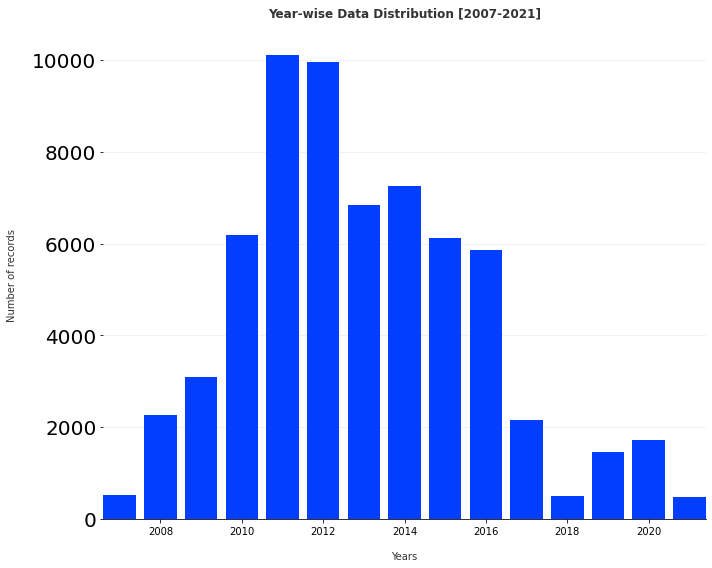

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(ydd.keys(), ydd.values())

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible('#DDDDDD')

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("Years", labelpad=15, color='#333333')
ax.set_ylabel('Number of records', labelpad=15, color='#333333')
ax.set_title('Year-wise Data Distribution [2007-2021]', pad=15, color='#333333',
             weight='bold')
ax.margins(x=0)

matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=20)
fig.tight_layout()

#save figure
plt.savefig("/content/drive/MyDrive/Data Science Project/Visualizations/year-wise-distribution.jpg")

* 2011 and 2012 have maximum number of records, where as 2007, 2018, and 2021 have least.

---


* Next, lets check distribution by months

In [ ]:
#month-wise data distribution
mdd={}
for month in months:
  mdd[month]= len(groupby_month_data.get_group(month))


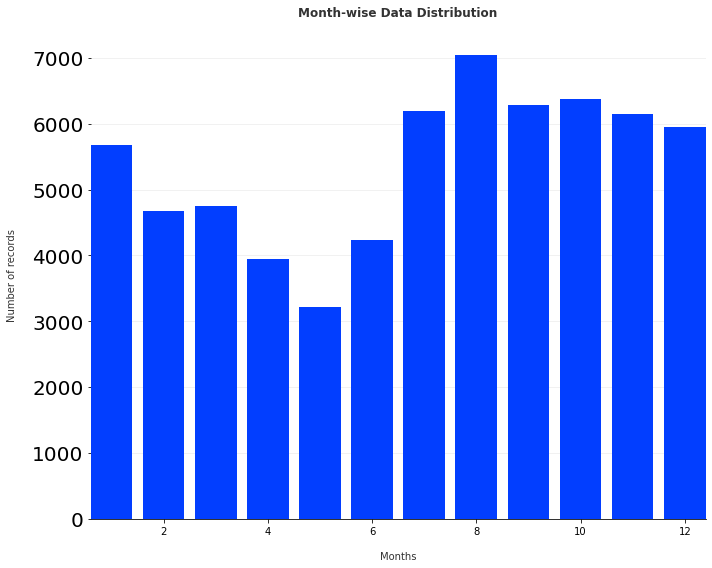

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(mdd.keys(), mdd.values())

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible('#DDDDDD')

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("Months", labelpad=15, color='#333333')
ax.set_ylabel('Number of records', labelpad=15, color='#333333')
ax.set_title('Month-wise Data Distribution', pad=15, color='#333333',
             weight='bold')
ax.margins(x=0)

matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=20)
fig.tight_layout()

#save figure
plt.savefig("/content/drive/MyDrive/Data Science Project/Visualizations/month-wise-distribution.jpg")

* month-wise data is fairly distributed, however, number of records in May is almost half of number of records in August
---
* What is the longest number of years a fox has been recorded?

In [ ]:
#group by fox identifier data
groupby_id_data = data.groupby("individual-local-identifier")

In [ ]:
Id_years = {}
for id in ids:
  Id_years[id] = groupby_id_data.get_group(id).year.value_counts().index.tolist()

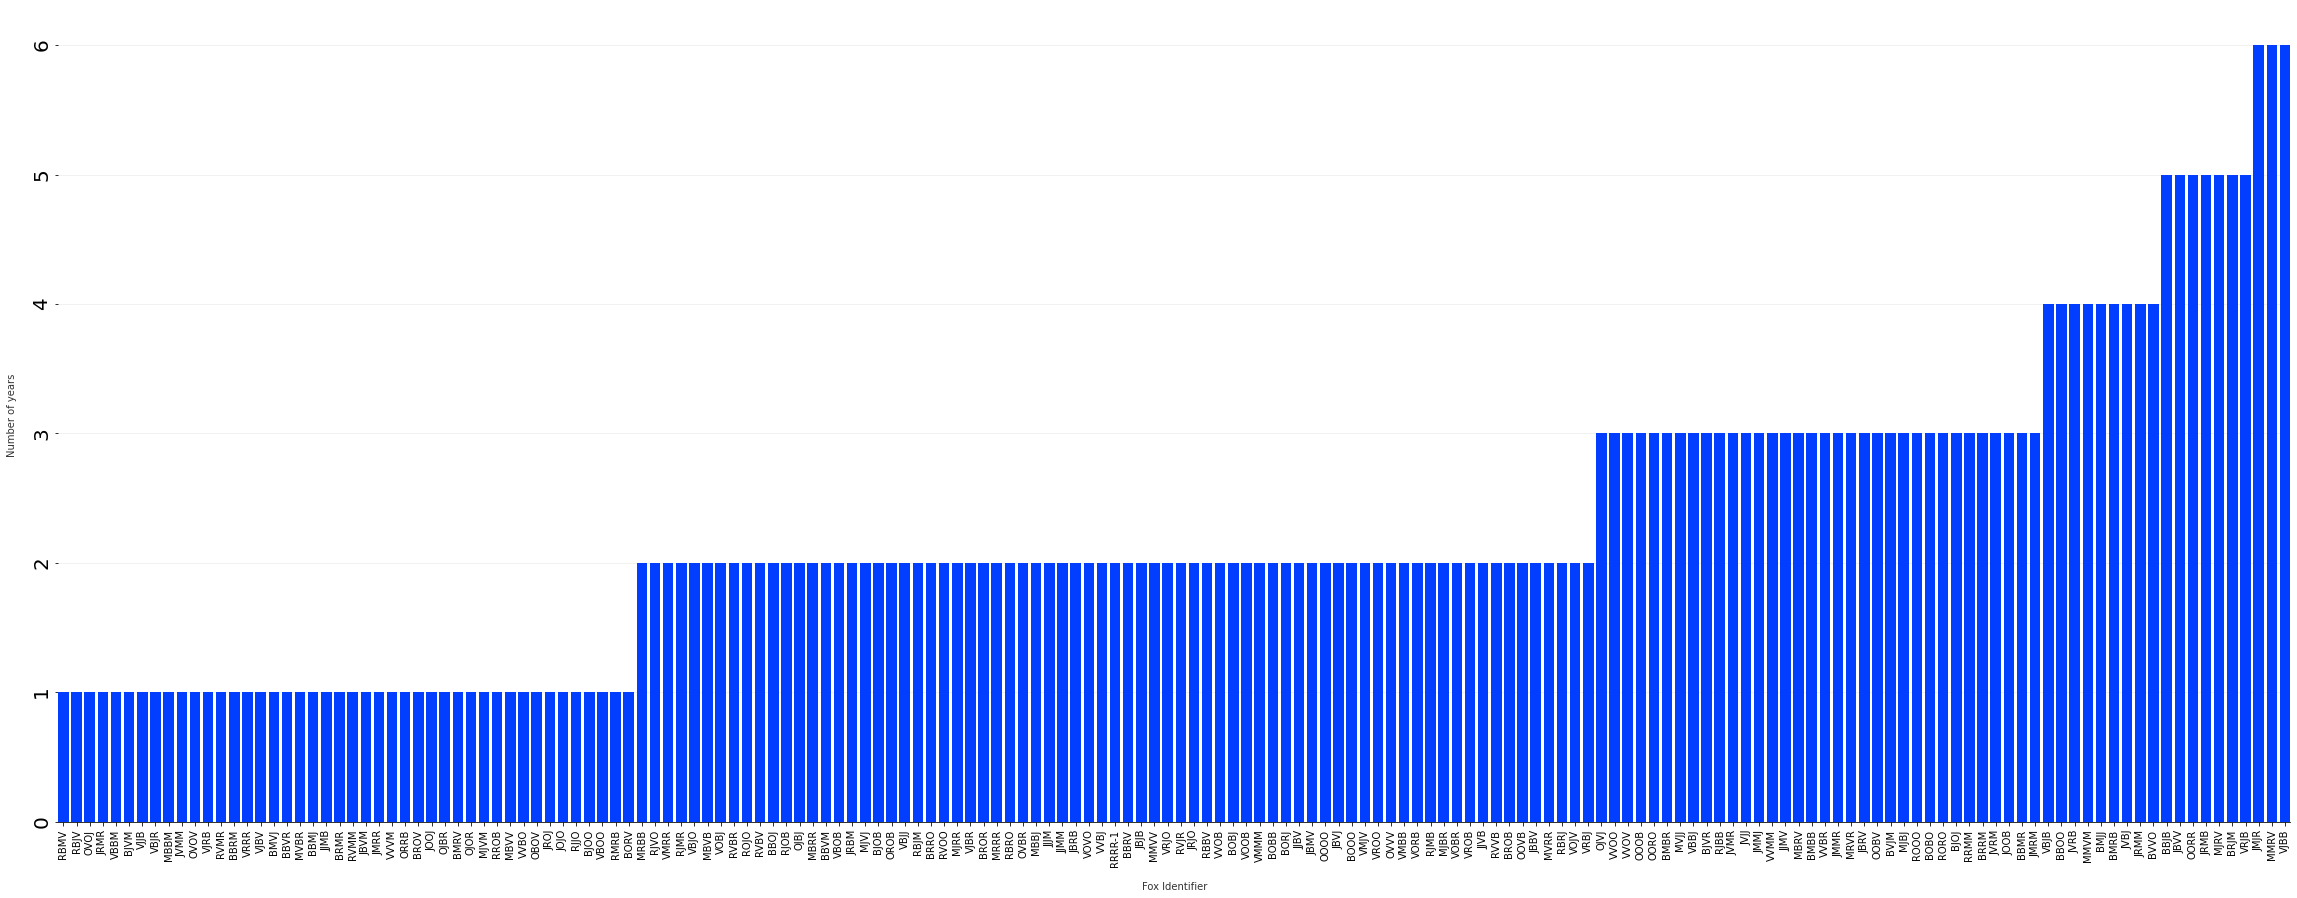

{1: 44, 2: 73, 3: 34, 4: 9, 5: 7, 6: 3}


<Figure size 432x288 with 0 Axes>

In [ ]:
X = list()
y = list()

#to keep count how many foxes have been recorded for how many years
counter={1:0,2:0,3:0,4:0,5:0,6:0}

#to get the names of top foxes
top_foxes = list()
threshold = 6  # 6 means names of foxes who are been recorded for 6 or more years
for i in Id_years.keys():
  X.append(i)
  n = len(Id_years[i])
  y.append(n)

  counter[n] = counter[n]+1
  if n>=threshold:
    top_foxes.append(i)
X = np.array(X)
y = np.array(y)
indexes = np.argsort(y)
fig, ax = plt.subplots(figsize=(40,15))
ax.margins(x=0)
ax.bar(X[indexes],y[indexes])
ax.tick_params(labelrotation=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible('#DDDDDD')

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("Fox Identifier", labelpad=15, color='#333333')
ax.set_ylabel('Number of years', labelpad=15, color='#333333')
plt.show()

print(counter)

plt.savefig("/content/drive/MyDrive/Data Science Project/Visualizations/Foxes_vs_year.jpg")

 * There are total 44 foxes with 1 year of tracking records, 
 * 73 foxes with 2 years,
 * 34 foxes with 3 year,
 * 9 foxes with 4 years,
 * 7 foxes with 5 years,
 * and 3 foxes with 6 years 

* What is the number of foxes been tracked every year?

In [ ]:
year_ids = {}
for year in years:
  year_ids[year] = groupby_year_data.get_group(year)["individual-local-identifier"].value_counts().index.tolist()

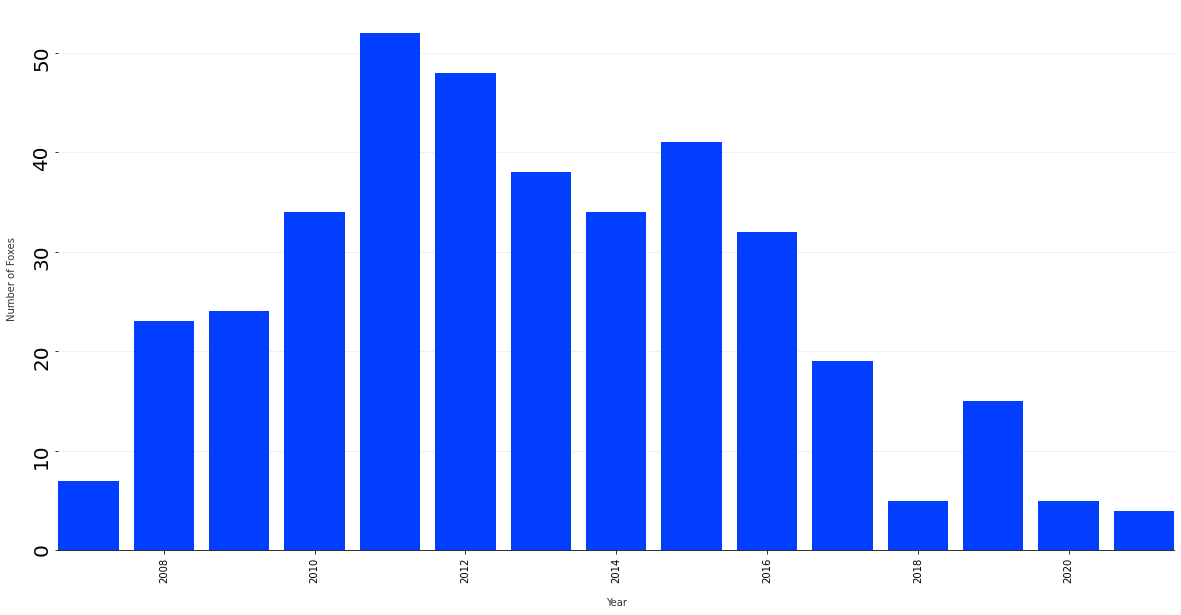

In [ ]:
X = list()
y = list()

for i in year_ids.keys():
  X.append(i)
  n = len(year_ids[i])
  y.append(n)

X = np.array(X)
y = np.array(y)
indexes = np.argsort(y)
fig, ax = plt.subplots(figsize=(20,10))
ax.margins(x=0)
ax.bar(X[indexes],y[indexes])
ax.tick_params(labelrotation=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible('#DDDDDD')

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("Year", labelpad=15, color='#333333')
ax.set_ylabel('Number of Foxes', labelpad=15, color='#333333')
plt.show()
#plt.savefig("/content/drive/MyDrive/Data Science Project/Visualizations/year_vs_foxes.jpg")

### Migration Visulization
* Movement of foxes in summer vs winter
* Distribution plot to identify home/local territory and other hotspot
* Interactive map to analyse  movement of foxes over the years




---
Lets plot Foxes movement in summer vs winter over the years


In [ ]:
#Select the data where month is in june, july, august, and september
summer_data = data[data.month.isin([6,7,8,9])]

In [ ]:
#before plotting the graph over image, lets get the min and max values of latitude and longitude
min_long = min(data['location-long'])
max_long = max(data['location-long'])
min_lat = min(data['location-lat'])
max_lat = max(data['location-lat'])

In [ ]:
#plot the data using latitute and longitude, and keep color hue based on year
fig, axes = plt.subplots(figsize=(20,15))
axes.set_xlim([min_long, max_long])
axes.set_ylim([min_lat, max_lat])
axes.imshow(plt.imread("/content/drive/MyDrive/Data Science Project/Images/july_summer.jpg"), extent=[min_long, max_long, min_lat, max_lat], aspect="auto")
sns.scatterplot(x=summer_data["location-long"], y=summer_data["location-lat"], hue=summer_data['year'], legend="full", palette='deep', edgecolor="black")


#save the plot
plt.savefig("/content/drive/MyDrive/Data Science Project/Visualizations/summer_movement.jpg")

Output hidden; open in https://colab.research.google.com to view.

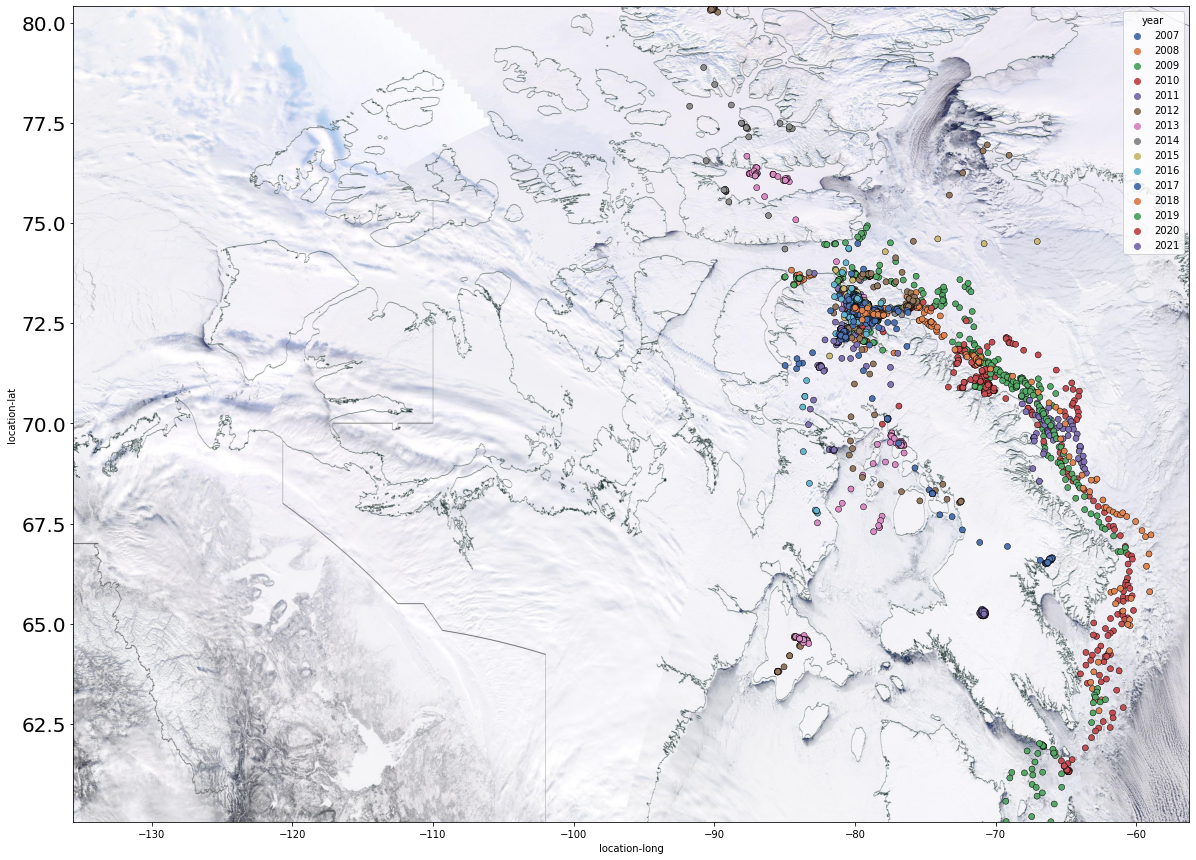

In [ ]:
#now lets do same thing for winter months.
# select data where month is in November, December, January, and february
winter_data = data[data.month.isin([11,12,1,2])]


#plot the graph
#note: i have used different satellite images in both the graphs(1 was taken in march and other one in july)
fig, axes = plt.subplots(figsize=(20,15))
axes.set_xlim([min_long, max_long])
axes.set_ylim([min_lat, max_lat])
axes.imshow(plt.imread("/content/drive/MyDrive/Data Science Project/Images/march_winter.jpg"), extent=[min_long, max_long, min_lat, max_lat], aspect="auto")
sns.scatterplot(x=winter_data["location-long"], y=winter_data["location-lat"], hue=winter_data['year'], legend="full", palette='deep', edgecolor="black")


#save the plot
plt.savefig("/content/drive/MyDrive/Data Science Project/Visualizations/winter_movement.jpg")



---


**Now lets identify their the local/territory***

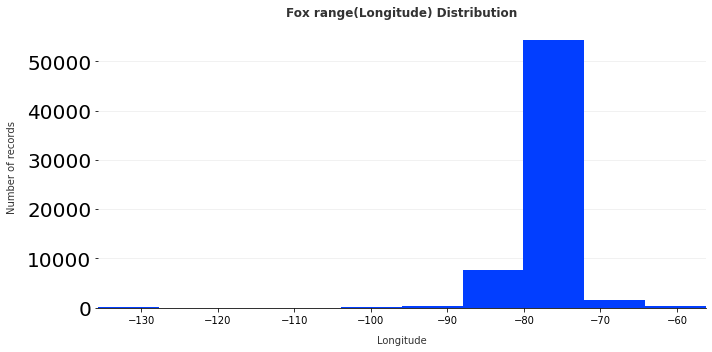

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(data["location-long"])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible('#DDDDDD')

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("Longitude", labelpad=10, color='#333333')
ax.set_ylabel('Number of records', labelpad=10, color='#333333')
ax.set_title('Fox range(Longitude) Distribution', pad=10, color='#333333',
             weight='bold')
ax.margins(x=0)
#plt.xticks(np.arange(min_long, max_long,5))
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=20)
fig.tight_layout()

#save figure
plt.savefig("/content/drive/MyDrive/Data Science Project/Visualizations/long_dis.jpg")

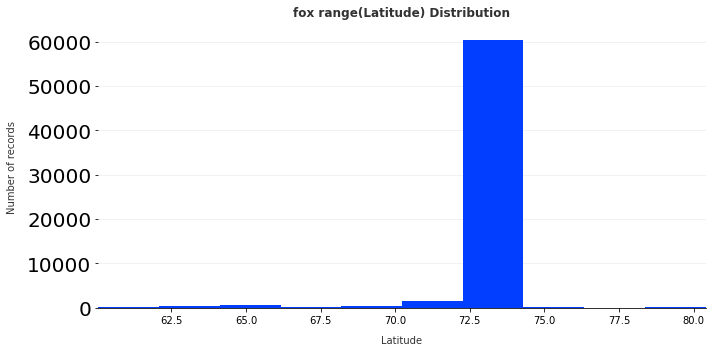

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(data["location-lat"])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible('#DDDDDD')

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("Latitude", labelpad=10, color='#333333')
ax.set_ylabel('Number of records', labelpad=10, color='#333333')
ax.set_title('fox range(Latitude) Distribution', pad=10, color='#333333',
             weight='bold')
ax.margins(x=0)
#plt.xticks(np.arange(min_long, max_long,5))
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=20)
fig.tight_layout()

#save figure
plt.savefig("/content/drive/MyDrive/Data Science Project/Visualizations/lat_dis.jpg")

<Figure size 720x720 with 0 Axes>

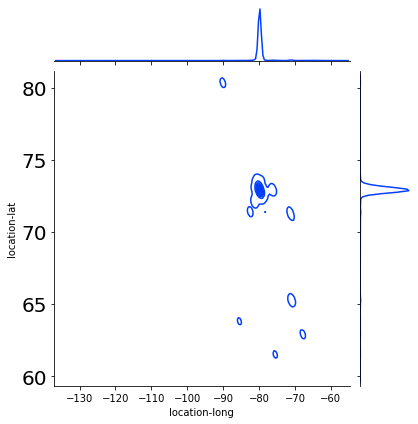

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data["location-long"], y=data["location-lat"], kind='kde')
#save figure
plt.savefig("/content/drive/MyDrive/Data Science Project/Visualizations/join_dis.jpg")



---
**Interactive map to analyse movement of foxes over the years**



In [ ]:
fake_data =  data.groupby("individual-local-identifier").first()
fake_data = fake_data.reset_index(level=0)

fake_data.loc[:,'location-long'] = 0.0
fake_data.loc[:,'location-lat'] = 0.0

In [ ]:
years = np.sort(data['year'].unique())
ids = data["individual-local-identifier"].unique()

In [ ]:
#for i in add_ids:
for y  in years:
  add_ids = [i for i in ids if i not in data[data.year==y]["individual-local-identifier"].unique()]
  append_data = fake_data[fake_data["individual-local-identifier"].isin(add_ids)]
  append_data = append_data.assign(year=y)
  data = data.append(append_data)

In [ ]:
data = data.sort_values('year')

In [ ]:
temp = data[data.year>=2016]
#temp = data[data["individual-local-identifier"].isin(top_foxes)]
fig = px.scatter_mapbox(data, lat="location-lat", lon="location-long",zoom=5,color="individual-local-identifier",custom_data=["individual-local-identifier", "timestamp", "season"], animation_frame="year", animation_group="individual-local-identifier")

fig.layout.showlegend=False

CUSTOM_HOVERTEMPLATE = "<br>".join(["Fox_ID: %{customdata[0]}", "Timestamp: %{customdata[1]}", "Season: %{customdata[2]}"])

fig.update_traces(hovertemplate=CUSTOM_HOVERTEMPLATE)
for frame in fig.frames:
    for d in frame.data:
      d.hovertemplate = CUSTOM_HOVERTEMPLATE

fig.update_layout(
    mapbox_style='white-bg',
    mapbox_layers=[
        {
        "below":'traces',
        "sourcetype":"raster",
        "sourceattribution":"United States Geological Survey",
        "source":[
            "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
        ]
    }],
    
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},height=1000)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig.write_html("/content/drive/MyDrive/Data Science Project/Visualizations/mapplot.html")